In [31]:
using PyPlot

### Teilaufgabe a

In [30]:
function f(x)
    return 5*x^4
end
function simpson(func, start, stop, N)
    if N%2 != 1
        throw(ArgumentError("N is not uneven"))
    end
    I = 0
    h = (stop-start)/(N-1)
    x = linspace(start, stop, N)
    for i in 1:N
        f_i = func(x[i])
        if i in [1, N]
            I += f_i
        elseif i%2 == 0
            I += f_i*4
        else
            I += f_i*2
        end
    end
    return I*h/3
end

simpson (generic function with 1 method)

### Teilaufgabe b

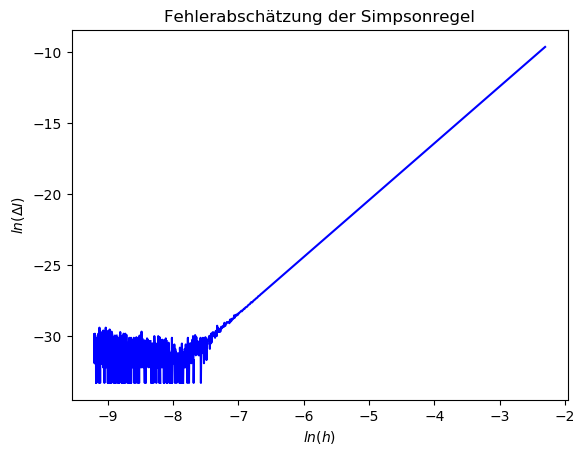

In [47]:
a = 1
b = 2
N_step = 10
I_ana = 31
x = Array(Float64, Int(round((10000-10)/N_step, RoundDown)+1))
y = Array(Float64, Int(round((10000-10)/N_step, RoundDown)+1))
i = 1
for N in 11:N_step:10001
    x[i] = log((b-a)/(N-1))
    d_I = abs(simpson(f, a, b, N)-I_ana)
    y[i] = log(d_I)
    i += 1
end
p = plot(x, y, "b-")
xlabel("\$ln(h)\$")
ylabel("\$ln(\\Delta I)\$")
title("Fehlerabschätzung der Simpsonregel")
show()

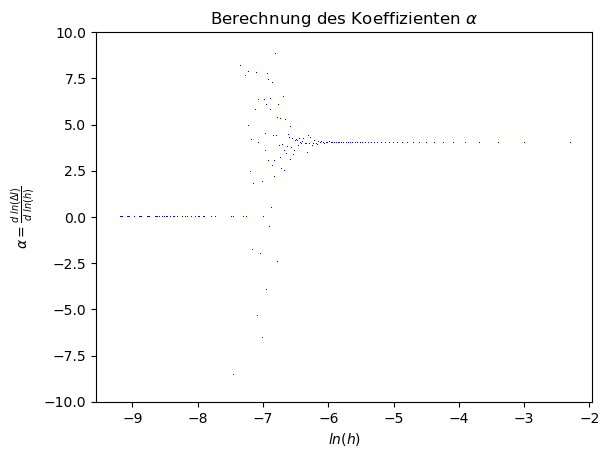

In [46]:
forward_diff_x = Array(Float64, length(x)-1)
forward_diff = Array(Float64, length(x)-1)
for i = 1:length(x)-1
    forward_diff_x[i] = x[i]
    forward_diff[i] = (y[i+1]-y[i])/(x[i+1]-x[i])
end
p = plot(forward_diff_x, forward_diff, "b,")
xlabel("\$ln(h)\$")
ylabel("\$\\alpha = \\frac{d\\ ln(\\Delta I)}{d\\ ln(h)}\$")
title("Berechnung des Koeffizienten \$\\alpha\$")
#ax = gca()
#ax[:set_ylim]((-10,10))
show()